In [302]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import sklearn
import seaborn as sns
import re

In [303]:
train = pd.read_csv("toxic_train.csv")
test = pd.read_csv("toxic_test.csv")
test_labels = pd.read_csv("toxic_test_labels.csv")

In [304]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [305]:
test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [306]:
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [307]:
train_copy = train.copy()
train_copy.head(10)
# Possible for a comment to not belong to any of the categories

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [308]:
# Get class labels
class_list = list(train_copy.columns[2:])
class_list

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [309]:
# Identifying comments that belong to none of the categories
train_copy["none"] = sum([train_copy[classes] for classes in class_list])
train_copy["none"] = train_copy["none"] == 0
train_copy["none"] = train_copy["none"].astype(int)
train_copy.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [310]:
# Finding total counts of comments that belong to each category
count_list = []
for comment_class in class_list + ['none']:
    total_class = sum(train_copy[comment_class])
    count_list.append(total_class)
count_list

[15294, 1595, 8449, 478, 7877, 1405, 143346]

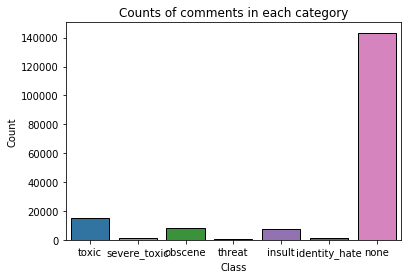

In [311]:
count_data = {'Class': class_list + ['none'], 'Count': count_list}
count_df = pd.DataFrame(count_data)
sns.barplot(x="Class", y="Count", data=count_df)
plt.title('Counts of comments in each category');
# A majority of the comments do not seem to be part of any of the given categories

In [312]:
# Split training data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_copy["comment_text"],
                                                    train_copy[class_list], 
                                                    test_size = 0.20, random_state = 12)

In [313]:
# Creating tokenizer to remove stop words, remove puncutation, stem words, and split words into a list
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
stop_words = ['i', 'u', 'as', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'user', 'im', 'amp']

def cust_tokenizer(sentence):
    punc_num = "@!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\,'" + '0123456789' 
    for punc in punc_num:
        sentence = sentence.replace(punc, '')
    tokenized = word_tokenize(sentence.lower())
    new_tokenized = []
    for word in tokenized:
        if word not in stop_words:
            new_tokenized.append(ps.stem(word))     # Keep words that are not stop words and stem
    return new_tokenized

In [314]:
cust_tokenizer("\n\nApparently, other editors agree that the")

['appar', 'editor', 'agre']

In [322]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(min_df=5, stop_words=stop_words, ngram_range=(1, 1), tokenizer=cust_tokenizer)
# Decided to use TfidfVectorizer instead of CountVectorizer due to increased performance and faster training using logistc regression
# Having n-grams of more than 1 significantly increases training time with only a small increase in performance
# Decided to not include words that appered in less than 5 sentences as those words may be simply noise that most likely will not contribute towards determining the class

In [316]:
# Creating pipeline to preprocess and make prediction
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

nb_pipe = Pipeline([
                ('tfidf', tfidf),
                ('nb', OneVsRestClassifier(MultinomialNB())),
            ])

In [317]:
nb_pipe.fit(X_train, y_train)
nb_pred = nb_pipe.predict_proba(X_test)
nb_pred[:5]

array([[2.87727081e-03, 1.08621785e-05, 6.42290511e-04, 2.85123831e-06,
        4.79701245e-04, 1.17922659e-05],
       [8.47563955e-06, 2.21238506e-10, 1.06778472e-06, 1.88446864e-11,
        5.72740146e-07, 2.57634843e-10],
       [2.82780030e-04, 5.59999714e-08, 3.90292266e-05, 4.89632971e-09,
        2.56606880e-05, 6.32676997e-08],
       [1.03432823e-02, 2.11616094e-04, 4.70124703e-03, 5.52184637e-05,
        3.76603650e-03, 2.29222931e-04],
       [1.01642626e-02, 8.68517345e-06, 1.68595055e-03, 1.71045795e-06,
        1.38034452e-03, 2.14906235e-05]])

In [318]:
np.round(nb_pipe.predict_proba([train_copy.iloc[6, 1]]), 2)

array([[0.93, 0.02, 0.77, 0.  , 0.58, 0.  ]])

In [319]:
from sklearn.metrics import roc_auc_score
def compute_auc(predictions):
    """Computes and prints AUC score for each category"""
    auc_list = []
    for i, comment_class in enumerate(class_list):
        class_pred = [row[i] for row in predictions]
        auc_score = roc_auc_score(y_test[comment_class], class_pred)
        print("AUC Score for " + comment_class + " : " + str(auc_score))
        auc_list.append(auc_score)
    print("Average AUC Score: " + str(np.average(auc_list)))
compute_auc(nb_pred)

AUC Score for toxic : 0.9429344764368134
AUC Score for severe_toxic : 0.9245180633307909
AUC Score for obscene : 0.9445599887705467
AUC Score for threat : 0.8229586213183498
AUC Score for insult : 0.9401451164140031
AUC Score for identity_hate : 0.896896342523793
Average AUC Score: 0.9120021014657161


In [320]:
from sklearn.linear_model import LogisticRegression

log_pipe = Pipeline([
                ('tfidf', tfidf),
                ('log', OneVsRestClassifier(LogisticRegression(max_iter=1000, solver="lbfgs", multi_class='ovr'))),
            ])
log_pipe.fit(X_train, y_train)
log_pred = log_pipe.predict_proba(X_test)
log_pred[:5]

array([[0.00782557, 0.00168345, 0.00525236, 0.00120839, 0.00536203,
        0.00153262],
       [0.00082312, 0.00028551, 0.0012087 , 0.00063025, 0.00099485,
        0.00035307],
       [0.00148633, 0.00055968, 0.00148747, 0.00037878, 0.00137769,
        0.00042197],
       [0.00651324, 0.00178018, 0.0053388 , 0.00178535, 0.00408015,
        0.00212372],
       [0.02605563, 0.00250307, 0.0114484 , 0.00317097, 0.01330408,
        0.00652013]])

In [321]:
compute_auc(log_pred)

AUC Score for toxic : 0.9693903309088051
AUC Score for severe_toxic : 0.9864917658458895
AUC Score for obscene : 0.9853530593575912
AUC Score for threat : 0.9721787136945508
AUC Score for insult : 0.9762073914386287
AUC Score for identity_hate : 0.97362161769304
Average AUC Score: 0.9772071464897509


Logistic Regression seems to perform the best with an average AUC score of 0.977 while Naive Bayes Classifer only achieved an AUC score of 0.912. To improve the prediction, I would try changing some of the preprocessing and trying other algorithms.